<a href="https://colab.research.google.com/github/ali-unlu/Extracting-and-Visualizing-Stock-Data/blob/main/Tesla_and_gme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Extracting and Visualizing Stock Data</h1>

---



---


<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this demonsration, I will extract Tesla dn GameStop stocks data and then display the results in graphs. This is part of my training material of the IBM Data Science course in Coursera.


In [35]:
# Required libraries

#!pip install yfinance
#!pip install pandas
#!pip install requests
#!pip install bs4
#!pip install plotly

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, I use a ready function `make_graph` from the course materials. It might be complicated but if you prepare the input properly, it works fine.  It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Extracting TESLA Stock Data





Firstly, I will create a ticker object with the `Ticker` function that we want to extract data. In this demonstration, I use Tesla and its ticker symbol is `TSLA`.


In [12]:
tesla = yf.Ticker("TSLA") 
tesla

yfinance.Ticker object <TSLA>

Firstly, I use the ticker object and the function `history` to extract stock information and then save it in a dataframe. I set the `period` parameter to `max` so I get information for the maximum amount of time.

In the second step, I use the `reset_index(inplace=True)` function on the DataFrame and I also display the first five rows of the dataframe. 



In [13]:
tesla = tesla.history(period="max")


In [14]:

# reset index
tesla.reset_index(inplace=True)
# Head
tesla.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


We can also see how Tesla stocks change in the last 10 years. 

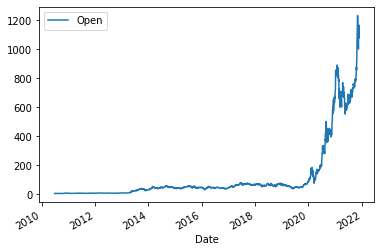

In [15]:


# plot the tesla 
tesla.plot(x="Date", y="Open") 




```
# This is formatted as code
```

## Webscraping to Extract Tesla Revenue Data


In this stange, I will use the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue](https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01). 

This page contains information how much revenue Tesla has during these years. 


In [16]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
data  = requests.get(url).text

After getting the page, I will parse the html data using `beautiful_soup`.


In [18]:
soup = BeautifulSoup(data, 'html5lib')

To make a table from this web page, we can use both  `BeautifulSoup` or the `read_html` function. We will store `Tesla Quarterly Revenue` in this table that we will use mainly  `Date` and `Revenue` columns. I will go with beatifulsoup. 


In [19]:
table = soup.find_all('table')[1]
tesla_revenue=pd.DataFrame(columns=['Date','Revenue'])

for row in table.find('tbody').find_all('tr'):
    col=row.find_all('td')
    date=col[0].text
    revenue=col[1].text
    tesla_revenue=tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

We have now a table but numbers comes with the comma and dollar sign, so we will remove them below.  


In [21]:
# clean $ signs and comma
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

We also need to remove an null or empty strings in the Revenue column.


In [22]:
# remove NAs
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [23]:
tesla_revenue.head()

,Date,Revenue
0,2021-09-30,13757
1,2021-06-30,11958
2,2021-03-31,10389
3,2020-12-31,10744
4,2020-09-30,8771





## Extracting GAMESTOP Stock Data


I am applying the same method above to exact the stock of GameStop and its ticker symbol is `GME`.


In [24]:
gm = yf.Ticker("GME") 
#gm

Using the ticker object and the function `history`, we extract stock information and save it in a dataframe and set the `period` parameter to `max`, so we get information for the maximum amount of time.

You can also see the head of the dataframe below.


In [25]:
gm_data=  gm.history(period="max")



In [26]:

# rested the index
gm_data.reset_index(inplace=True) 
gm_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480514,6.773400,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850829,6.864295,6.682504,6.733001,2755400,0.0,0.0
2,2002-02-15,6.733002,6.749834,6.632007,6.699337,2097400,0.0,0.0
3,2002-02-19,6.665672,6.665672,6.312190,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463682,6.648839,6.413184,6.648839,1723200,0.0,0.0


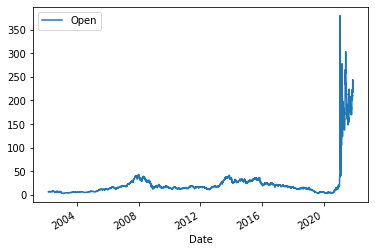

In [34]:
#plot the GME
gm_data.plot(x="Date", y="Open") 

## Webscraping to Extract GME Revenue Data


Same page for the revenue but the link is for GME [https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue](https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01). 


In [27]:
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

gme  = requests.get(url).text


Parsing the html data  with`beautiful_soup`.


In [28]:
soup = BeautifulSoup(gme, 'html5lib')

Similarly as above, we are extracting the revenue table and clean the numbers from the comma and dollar signs. 


In [29]:
table = soup.find_all('table')[1]
gme_revenue=pd.DataFrame(columns=['Date','Revenue'])

for row in table.find('tbody').find_all('tr'):
    col=row.find_all('td')
    date=col[0].text
    revenue=col[1].text
    gme_revenue=gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
    
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

and here is the head of the dataframe as well


In [30]:
# head of the df
gme_revenue.head()


,Date,Revenue
0,2021-07-31,1183
1,2021-04-30,1277
2,2021-01-31,2122
3,2020-10-31,1005
4,2020-07-31,942


## Ploting the Tesla Stock Graph


We are now using the `make_graph` function to graph the Tesla Stock Data. 


In [36]:
make_graph(tesla, tesla_revenue,'Tesla')


## Ploting the GameStop Stock Graph


Same as above. for the the GameStop Stock Data


In [38]:
# plot the GameStop
make_graph(gm_data, gme_revenue,'GameStop')


Determining the price of a stock is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more.  An essential factor is the company's profit and growth of profits; if the company's profit is increasing, the stock price should increase.  If you suspect the company's profit increases, you should buy the stock as the stock should increase, But what happens if you think the stock price will decrease. 

Short selling is how you make money if the stock decreases. An investor borrows a stock, sells the stock, and then repurchases it to return it to the lender.  Typically stocks fall faster than they rise, so you can make a profit more quickly. Usually, experienced investors such as hedge funds partake in short selling. One problem is if the stock price increases, the investor can lose money.

Sometimes short sellers get it wrong; for example, Tesla.  A few years ago, many short sellers targeted Tesla. Then Tesla started becoming profitable, and profits were increasing; thus, the company stock went up. This was based on the companies performance, so the stock should continue to rise, and the short seller should sell the stock.  Recently shorted stocks can increase for reasons that are not based on fundamentals; this is less sustainable. 

"Individual investors using the forum on the Reddit online community named WallStreetBets, started buying into shares of GameStop, a video and computer-game retailer losing money. The influx of demand caused GameStop shares to soar.  All this produced billions of dollars in losses for hedge funds who had sold the stock short. [ 1] GameStop's share price should fall eventually, so the Hedge funds should hold on to the short positions. As a data scientist working for a hedge fund, we extracted the profit data for Tesla and GameStop and build a dashboard to compare the price of the stock vs the profit for the hedge fund.


So, it is not difficult to say which company has more rebust stocks based on our results. If you catch the trend in GME stocks, you have also change to become rich within couple of years.

PS: text is from the course web page but I have some edits. 

This analysis was inspired by the course materials of 
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Joseph Santarcangelo</a> 
